In [1]:
# https://scanpy.readthedocs.io/en/stable/tutorials/spatial/basic-analysis.html
# https://squidpy.readthedocs.io/en/stable/
# used data : https://support.10xgenomics.com/spatial-gene-expression/datasets/1.0.0/V1_Human_Lymph_Node

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(42)

In [3]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.11.1
scanpy      1.10.4
-----
PIL                         11.0.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        24.2.0
attrs                       24.2.0
babel                       2.16.0
certifi                     2024.08.30
charset_normalizer          3.3.2
cloudpickle                 3.1.0
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dask                        2024.12.0
dateutil                    2.9.0.post0
debugpy                     1.8.6
decorator                   5.1.1
defusedxml                  0.7.1
executing                   2.1.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.12.1
idna                        3.10
igraph                      0.11.8
ipykernel                   6.29.5
ipywidgets                  

In [4]:
print("Reading the data:")

Reading the data:


In [5]:
adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

reading C:\Users\user\Desktop\Spatial_Transcriptomics\data\V1_Human_Lymph_Node\filtered_feature_bc_matrix.h5


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
str(adata)

"AnnData object with n_obs × n_vars = 4035 × 36601\n    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'\n    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'\n    uns: 'spatial'\n    obsm: 'spatial'"

In [7]:
print('QC and preprocessing:')

QC and preprocessing:


<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

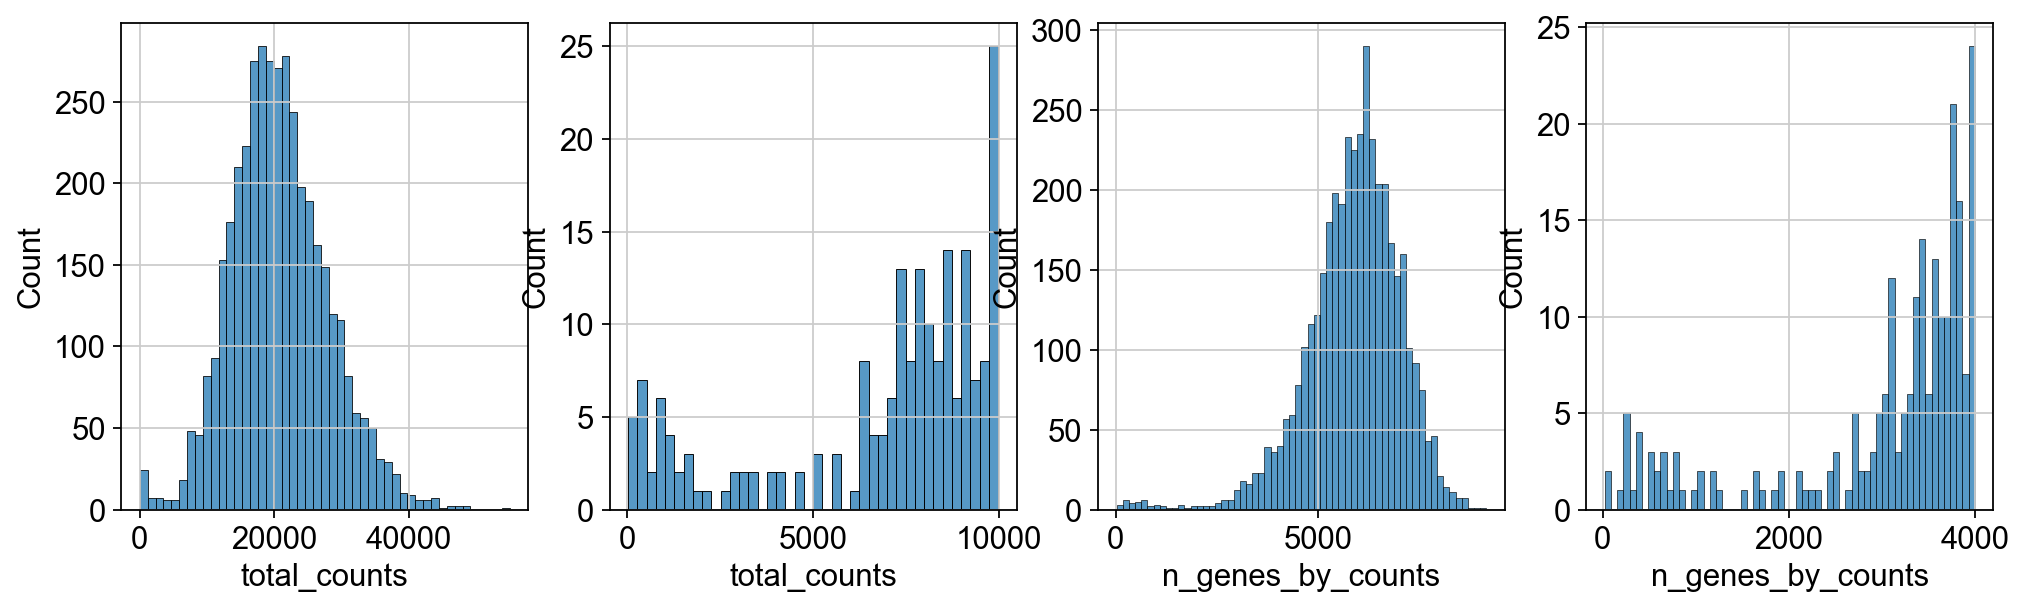

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [9]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

filtered out 44 cells that have less than 5000 counts
filtered out 130 cells that have more than 35000 counts
#cells after MT filter: 3861
filtered out 16916 genes that are detected in less than 10 cells


In [10]:
print('Normalization :')

Normalization :


In [11]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [12]:
print("Manifold embedding and clustering based on transcriptional similarity :")

Manifold embedding and clustering based on transcriptional similarity :


In [13]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

sc.tl.leiden(
    adata,
    key_added="clusters",
    directed=False,
    n_iterations=2
)

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:08)


C:\Users\user\AppData\Local\Temp\ipykernel_2264\3081113148.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(


running Leiden clustering
    finished: found 10 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


In [14]:
# Visualize the UMAP plot
# sc.pl.umap(adata)

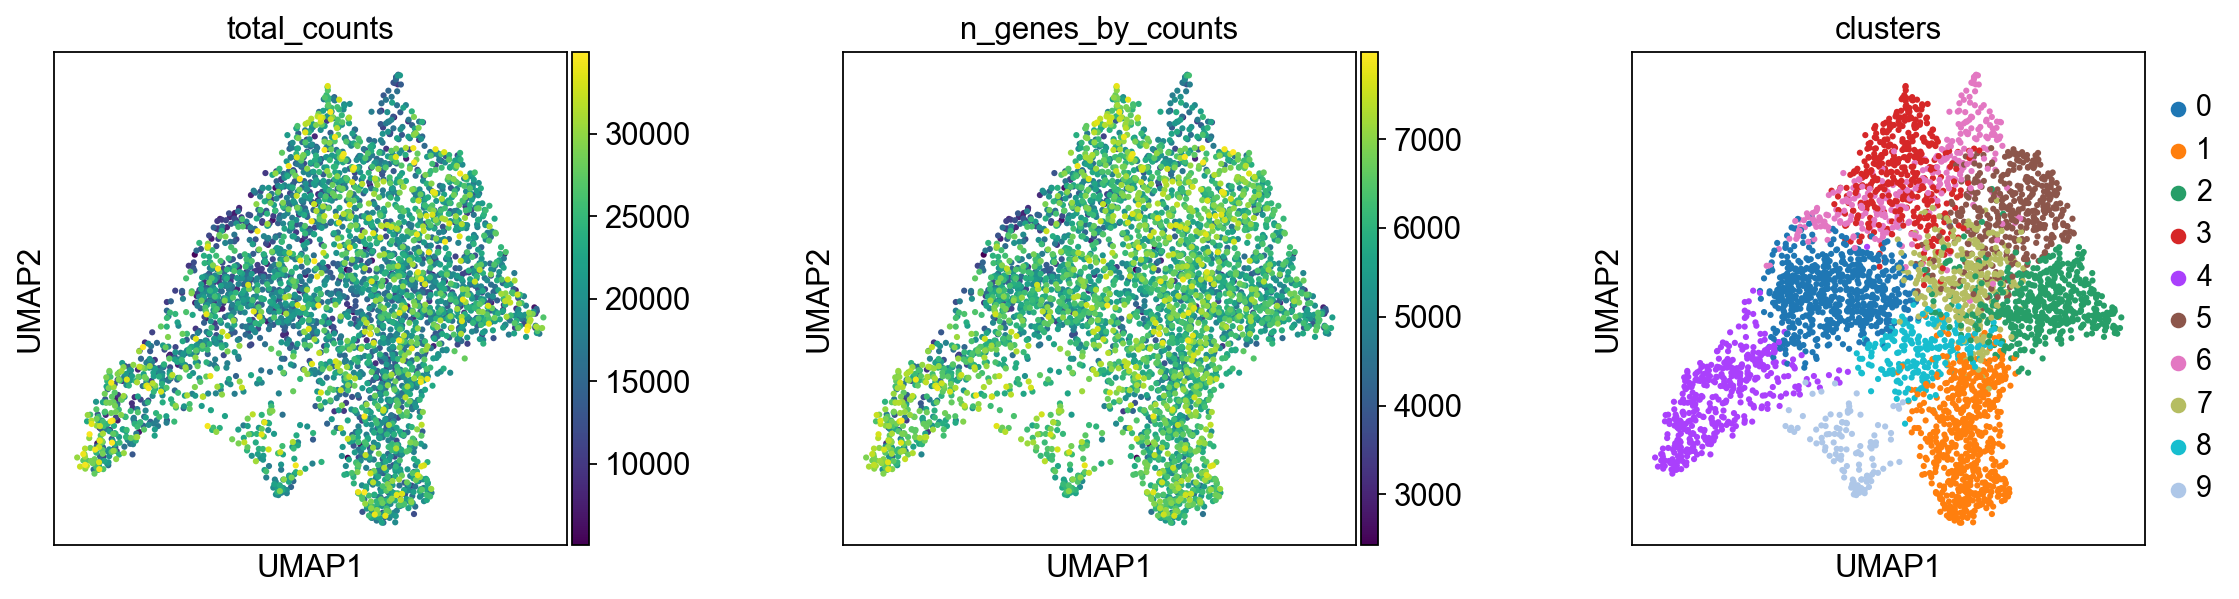

In [15]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

In [16]:
print("Visualization in spatial coordinates :")

Visualization in spatial coordinates :


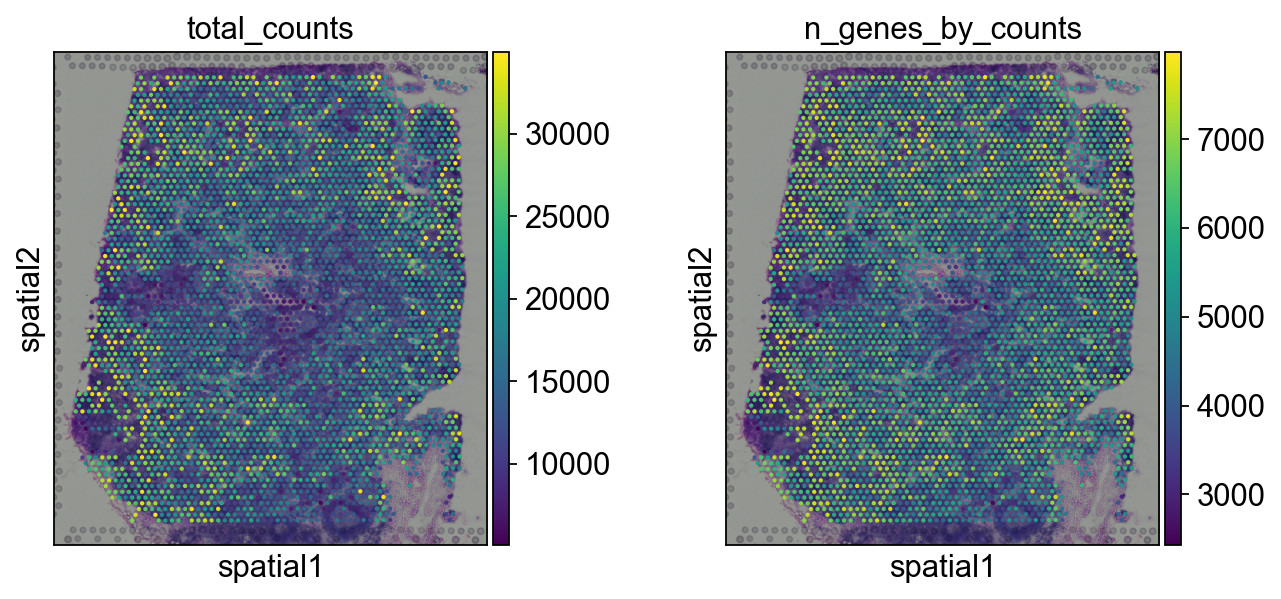

In [17]:
# using sc.pl.spatial :
# img_key: key where the img is stored in the adata.uns element
# crop_coord: coordinates to use for cropping (left, right, top, bottom)
# alpha_img: alpha value for the transcparency of the image
# bw: flag to convert the image into gray scale
# size parameter : it becomes a scaling factor for the spot sizes

plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

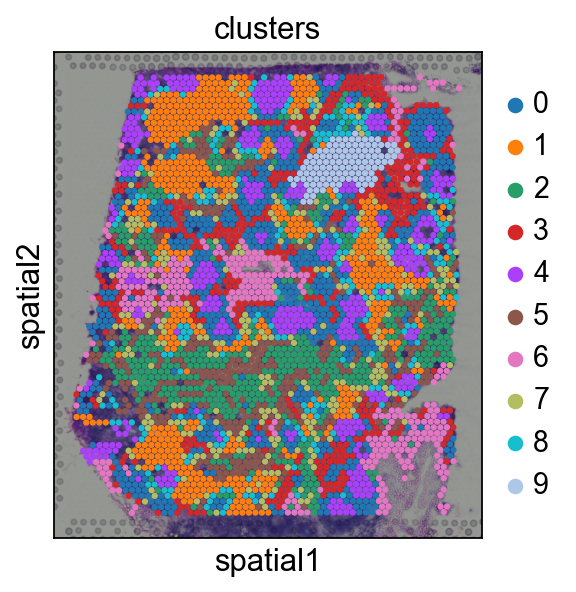

In [18]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

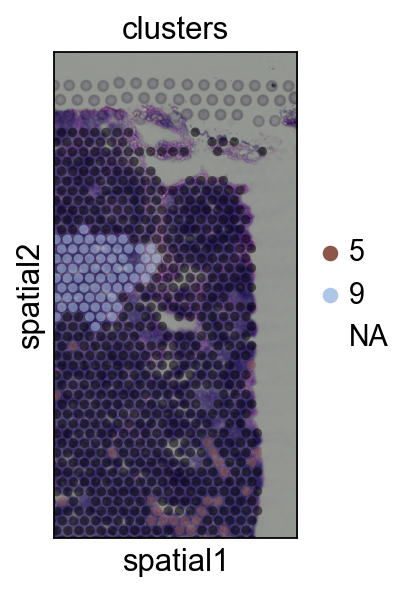

In [19]:
# By changing the alpha values of the spots, we can visualize better the underlying tissue morphology from the H&E image.

plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.spatial(
    adata,
    img_key="hires",
    color="clusters",
    groups=["5", "9"],
    crop_coord=[7000, 10000, 0, 6000],
    alpha=0.5,
    size=1.3,
)

Cluster marker genes :
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`
categories: 0, 1, 2, etc.
var_group_labels: 9


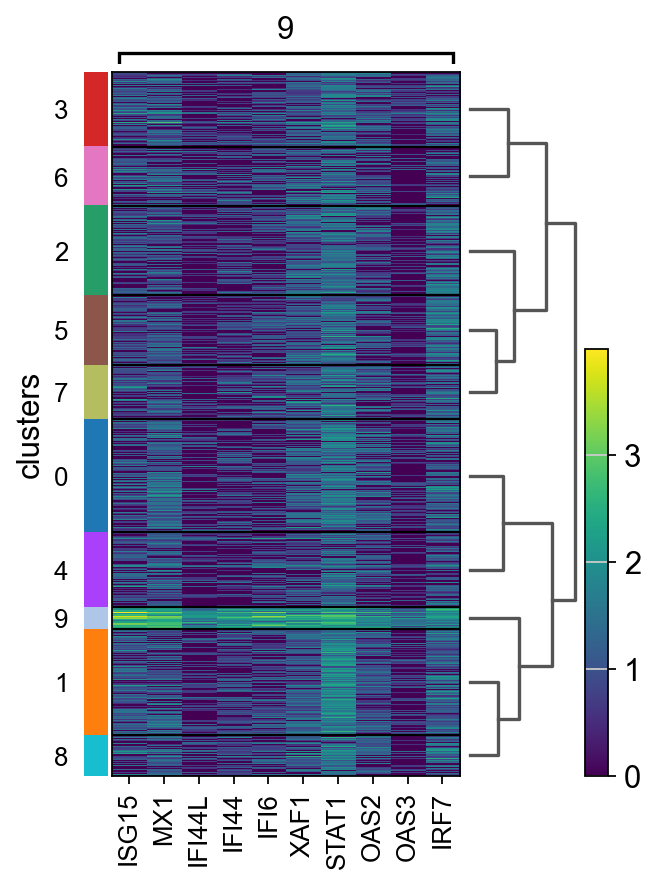

In [20]:
print("Cluster marker genes :")

# Let us further inspect cluster 5, which occurs in small groups of spots across the image.
# Compute marker genes and plot a heatmap with expression levels of its top 10 marker genes across clusters.

plt.rcParams["figure.figsize"] = (4, 4)
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="9", n_genes=10, groupby="clusters")

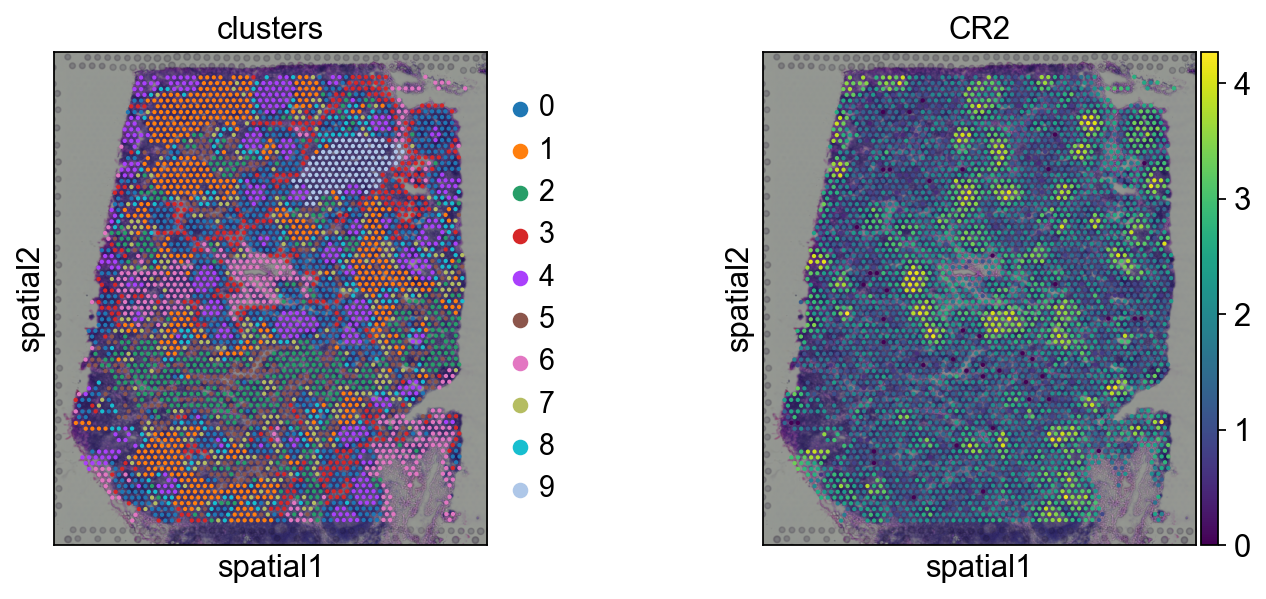

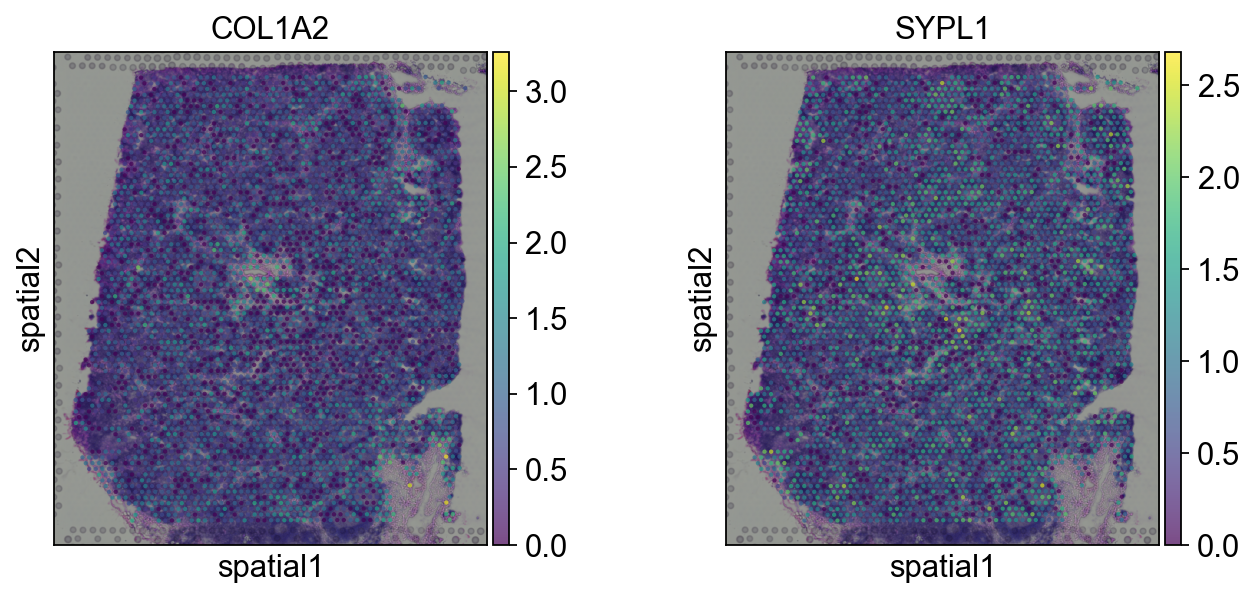

In [21]:
# We see that CR2 recapitulates the spatial structure.

sc.pl.spatial(adata, img_key="hires", color=["clusters", "CR2"])
sc.pl.spatial(adata, img_key="hires", color=["COL1A2", "SYPL1"], alpha=0.7)

In [22]:
print("A Merfish Example :")
import os

# Get the current working directory
current_folder = os.getcwd()
print("Current folder path:", current_folder)

A Merfish Example :
Current folder path: C:\Users\user\Desktop\Spatial_Transcriptomics


In [23]:
# coordinates = pd.read_excel("./merfish/pnas.1912459116.sd15.xlsx", index_col=0)
# counts = sc.read_csv("./merfish/pnas.1912459116.sd12.csv").transpose()

import pandas as pd

# Read the coordinates file (assuming it's a tab-delimited text file)
coordinates = pd.read_csv("./merfish/pnas.1912459116.sd12.txt", sep='\t', index_col=0)

# Print rows and columns separately
print("Number of rows:", coordinates.shape[0])
print("Number of columns:", coordinates.shape[1])

print(coordinates.head(3))

Number of rows: 8900
Number of columns: 1368
       B1_cell1  B1_cell2  B1_cell3  B1_cell4  B1_cell5  B1_cell6  B1_cell7  \
A1CF          0         0         1         1         0         0         0   
A2M           4         2         1         1         1         1         7   
A2ML1         0         0         0         0         0         0         0   

       B1_cell8  B1_cell9  B1_cell10  ...  B3_cell314  B3_cell315  B3_cell316  \
A1CF          0         1          0  ...         0.0         0.0         0.0   
A2M           5         0          0  ...         1.0         0.0         1.0   
A2ML1         0         0          0  ...         1.0         0.0         0.0   

       B3_cell317  B3_cell318  B3_cell319  B3_cell320  B3_cell321  B3_cell322  \
A1CF          0.0         0.0         0.0         0.0         0.0         0.0   
A2M           0.0         0.0         3.0         0.0         0.0         0.0   
A2ML1         0.0         0.0         0.0         1.0         0.0     

In [24]:
counts1 = pd.read_csv("./merfish/pnas.1912459116.sd15.sheet1.txt", sep='\t', index_col=0)
counts1 = counts1.transpose()

# Print rows and columns separately
print("Number of rows:", counts1.shape[0])
print("Number of columns:", counts1.shape[1])
print(counts1.head(3))

Number of rows: 2
Number of columns: 645
              B1_cell1     B1_cell2     B1_cell3     B1_cell4     B1_cell5  \
x_microns  -891.313702  -609.526668  -416.254156  -283.819862   -83.990122   
y_microns -1464.550024 -1457.751892 -1451.438190 -1470.768830 -1472.083057   

              B1_cell6     B1_cell7     B1_cell8     B1_cell9    B1_cell10  \
x_microns   524.513139  1074.899607  1305.153414  1562.123421  1678.586896   
y_microns -1468.855426 -1455.000790 -1457.479606 -1471.720412 -1451.114542   

           ...   B1_cell636   B1_cell637   B1_cell638   B1_cell639  \
x_microns  ...   150.892218  -940.323054  1496.255135   326.456359   
y_microns  ...  1668.983661  1682.229687  1654.024194  1669.248722   

            B1_cell640   B1_cell641   B1_cell642   B1_cell643   B1_cell644  \
x_microns  1618.485479 -1404.280333 -1147.346414  1164.401171    31.242861   
y_microns  1686.075261  1670.873055  1675.450682  1671.844596  1676.214779   

            B1_cell645  
x_microns  1215.82

In [25]:
counts2 = pd.read_csv("./merfish/pnas.1912459116.sd15.sheet2.txt", sep='\t', index_col=0)
counts2 = counts2.transpose()

# Print rows and columns separately
print("Number of rows:", counts2.shape[0])
print("Number of columns:", counts2.shape[1])
print(counts2.head(3))

Number of rows: 2
Number of columns: 400
              B2_cell1     B2_cell2     B2_cell3     B2_cell4     B2_cell5  \
x_microns -1405.162152     1.527491   278.222805   634.878363   818.295448   
y_microns -1444.964412 -1434.637254 -1457.511428 -1436.565978 -1441.332826   

              B2_cell6     B2_cell7     B2_cell8     B2_cell9    B2_cell10  \
x_microns  1365.447312   927.737251 -1087.390772  -808.822185   409.932018   
y_microns -1450.768981 -1425.053558 -1422.314565 -1447.640139 -1416.904108   

           ...   B2_cell391   B2_cell392   B2_cell393   B2_cell394  \
x_microns  ...  1289.254159  -960.552944  -103.604880    81.621873   
y_microns  ...  1664.402284  1644.348537  1669.308119  1678.015756   

            B2_cell395   B2_cell396   B2_cell397   B2_cell398   B2_cell399  \
x_microns  -296.254218  -522.446692  1528.198721   543.802237   295.543885   
y_microns  1676.169322  1691.621243  1692.063498  1688.379317  1676.841504   

            B2_cell400  
x_microns   663.16

In [26]:
counts3 = pd.read_csv("./merfish/pnas.1912459116.sd15.sheet3.txt", sep='\t', index_col=0)
counts3 = counts3.transpose()

# Print rows and columns separately
print("Number of rows:", counts3.shape[0])
print("Number of columns:", counts3.shape[1])
print(counts3.head(3))

Number of rows: 2
Number of columns: 323
              B3_cell1     B3_cell2     B3_cell3     B3_cell4     B3_cell5  \
x_microns -1375.706616  -341.671385  -221.114651    98.235196   445.156746   
y_microns -1455.720346 -1442.128506 -1452.552220 -1426.726277 -1425.201268   

              B3_cell6     B3_cell7     B3_cell8     B3_cell9    B3_cell10  \
x_microns   578.381732  1352.548263  -694.582342  -437.345786   908.690996   
y_microns -1449.066879 -1422.223095 -1426.159138 -1417.409844 -1413.549813   

           ...   B3_cell314   B3_cell315   B3_cell316   B3_cell317  \
x_microns  ...  1158.617861   631.548297  -452.503252  -581.253019   
y_microns  ...  1644.509204  1588.120442  1644.849210  1661.557899   

            B3_cell318   B3_cell319   B3_cell320   B3_cell321   B3_cell322  \
x_microns   482.200855 -1157.252043  -190.243030   697.138726 -1322.985397   
y_microns  1655.232806  1662.172290  1629.152291  1686.252964  1674.899565   

            B3_cell323  
x_microns  -340.77

In [27]:
# Get the current working directory
current_folder = os.getcwd()
print("Current folder path:", current_folder)

Current folder path: C:\Users\user\Desktop\Spatial_Transcriptomics


In [28]:
# Merfish example in : https://scanpy.readthedocs.io/en/stable/tutorials/spatial/basic-analysis.html